In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
teams_elo = pd.read_csv('./cleaned_data/elo_dfs/teams_elo_dataframe.csv')
teams_elo.drop('Unnamed: 0', axis=1, inplace=True)
elo = pd.read_csv('./cleaned_data/team_data/full_data_with_elo_carryover.csv')
elo.drop('Unnamed: 0', axis=1, inplace=True)
df = pd.read_csv('./cleaned_data/team_data/cleaned_games_full.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [189]:
elo

,TEAM_HOME,TEAM_AWAY,FG_HOME,FG_AWAY,FGA_HOME,FGA_AWAY,FG_PCT_HOME,FG_PCT_AWAY,FG(3)_HOME,FG(3)_AWAY,...,AWAY_GAMES_TEAM_AWAY,HOME_GAME_WIN_RATE_HOME,AWAY_GAME_WIN_RATE_AWAY,TEAM_ELO_BEFORE_HOME,TEAM_ELO_BEFORE_AWAY,TEAM_ELO_AFTER_HOME,TEAM_ELO_AFTER_AWAY,ODDS_HOME,PROBS_HOME,PROBS_AWAY
0,IND,ORL,34,36,71,93,0.479,0.387,7,9,...,0,0.000,0.000,1500.000000,1500.000000,1507.692053,1492.307947,1.698244,0.629389,0.370611
1,MIA,CHI,37,35,72,83,0.514,0.422,11,7,...,0,0.000,0.000,1500.000000,1500.000000,1508.625029,1491.374971,1.698244,0.629389,0.370611
2,LAL,LAC,42,41,93,83,0.452,0.494,14,8,...,0,0.000,0.000,1500.000000,1500.000000,1509.082043,1490.917957,1.698244,0.629389,0.370611
3,CLE,BRK,35,33,84,82,0.417,0.402,5,9,...,0,0.000,0.000,1500.000000,1500.000000,1504.687767,1495.312233,1.698244,0.629389,0.370611
4,TOR,BOS,38,32,86,66,0.442,0.485,5,3,...,0,0.000,0.000,1500.000000,1500.000000,1505.731675,1494.268325,1.698244,0.629389,0.370611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,PHI,CHI,52,45,93,95,0.559,0.474,12,9,...,40,0.550,0.375,1562.431336,1304.448953,1565.173917,1301.706372,7.498182,0.882328,0.117672
7376,SAS,DAL,41,37,88,91,0.466,0.407,8,11,...,40,0.600,0.225,1569.675994,1450.988011,1574.285951,1446.378054,3.362947,0.770797,0.229203
7377,DEN,MIN,39,39,87,91,0.448,0.429,10,13,...,40,0.500,0.275,1586.967348,1453.434768,1589.418141,1450.983975,3.662954,0.785544,0.214456
7378,LAC,UTA,54,47,106,106,0.509,0.443,12,14,...,40,0.625,0.450,1535.646064,1644.764733,1544.535489,1635.875308,0.906157,0.475384,0.524616


In [190]:
home_df_teams = teams_elo.loc[teams_elo['WHERE_PLAYED'] == 'Home']
away_df_teams = teams_elo.loc[teams_elo['WHERE_PLAYED'] == 'Away']

In [191]:
teams_elo.columns

Index(['GAMEID', 'TEAM', 'ELO', 'DATE', 'WHERE_PLAYED', 'SEASON', 'D_RTG',
       'GAME_NO', 'OPP_SCORE', 'O_RTG', 'SCORE'],
      dtype='object')

In [192]:
home_df_teams['ELO'].mean(), away_df_teams['ELO'].mean()

(1502.6391440066895, 1502.364127034755)

In [193]:
home_df_teams['ELO'].median(), away_df_teams['ELO'].median()

(1504.2527102215013, 1505.2909305421904)

In [194]:
home_df_teams['ELO'].skew(), away_df_teams['ELO'].skew()

(-0.083569797730568, -0.06369283035756419)

In [195]:
home_df_teams['SEASON'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

## SEEING IF THERE IS ANY FUNDAMENTAL DIFFERENCE BETWEEN AWAY AND HOME ELO

In [196]:
def get_line(team):
    t_home = home_df_teams.loc[home_df_teams['TEAM'] == team].copy()
    t_away = away_df_teams.loc[away_df_teams['TEAM'] == team].copy()
    h_elo = t_home['ELO']
    a_elo = t_away['ELO']
    h_seasons = t_home['SEASON'].unique()
    plt.plot(h_elo)
    plt.plot(a_elo)
    plt.xticks(ticks = [41,82,123,164,205,246],labels = h_seasons,rotation=20)
    plt.margins(x=0, y=0)
    plt.xlabel("X-axis", labelpad=7)
    plt.show()

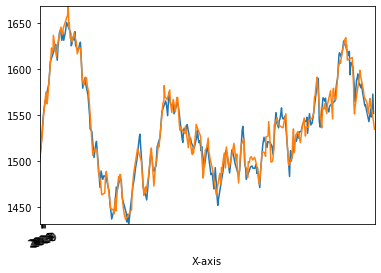

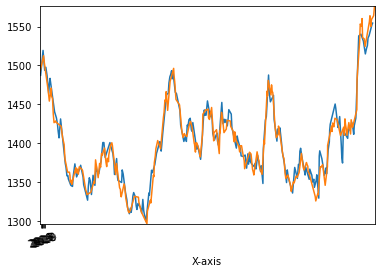

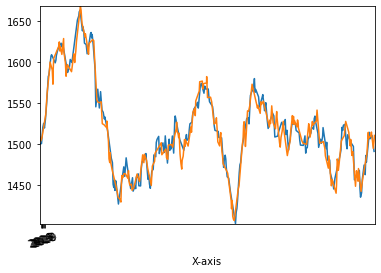

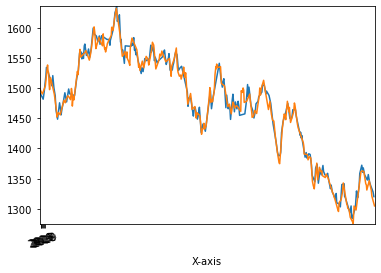

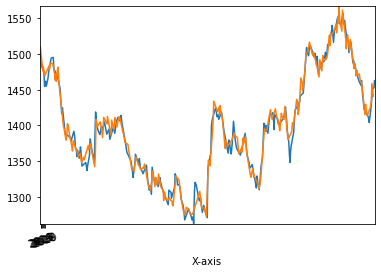

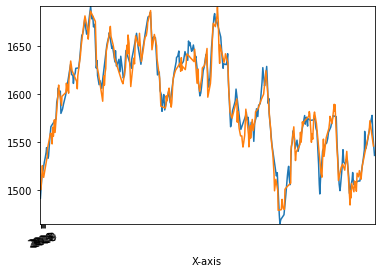

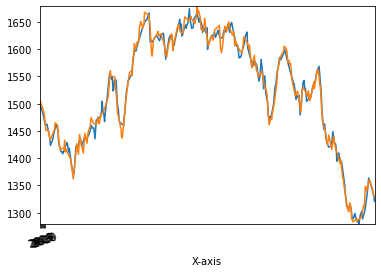

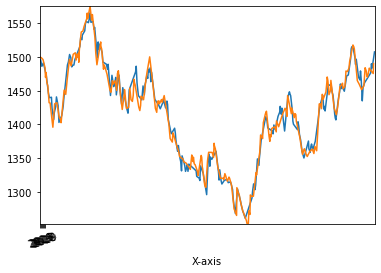

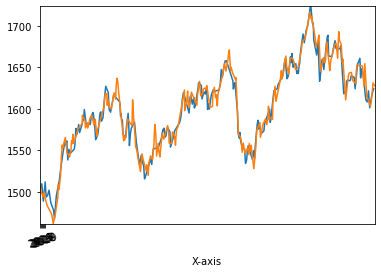

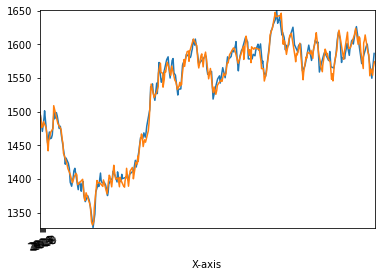

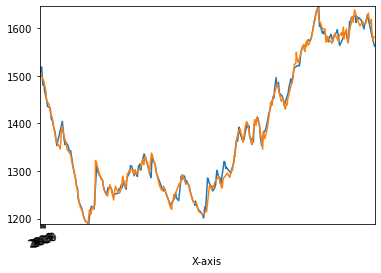

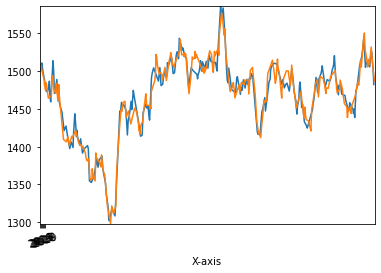

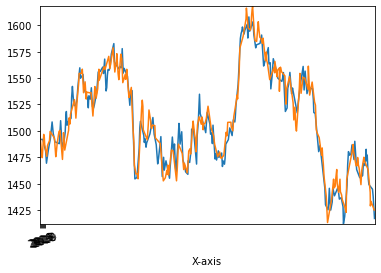

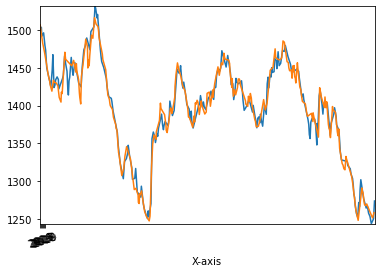

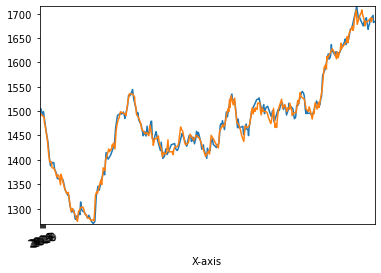

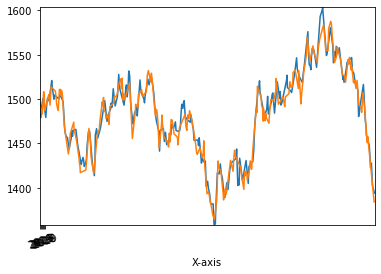

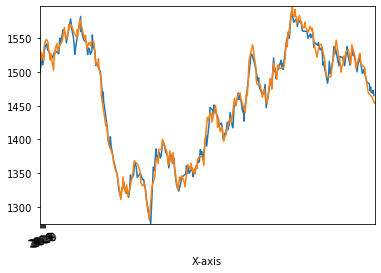

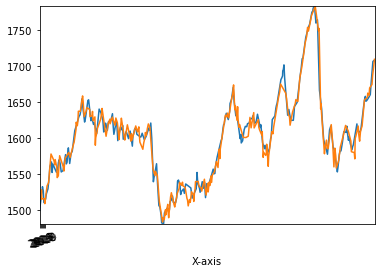

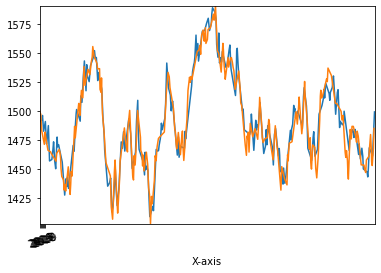

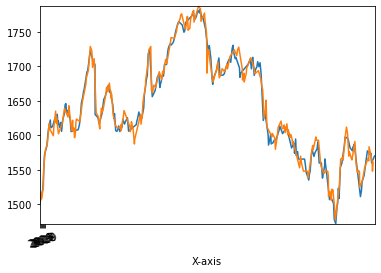

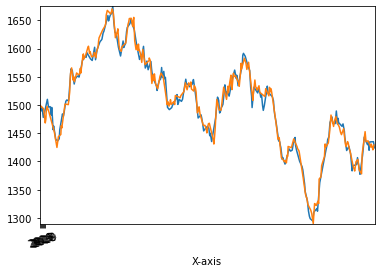

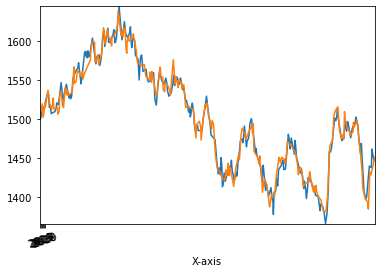

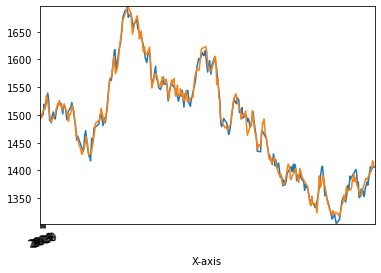

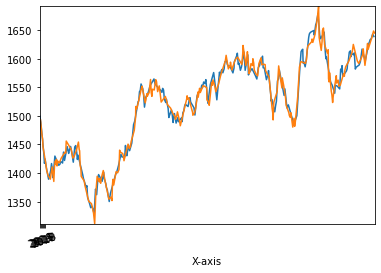

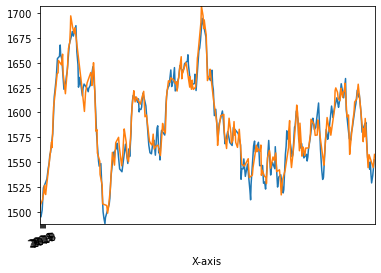

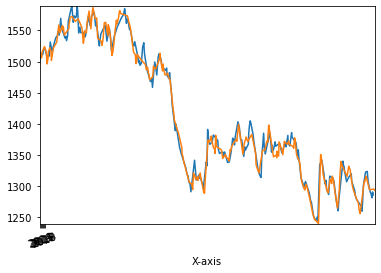

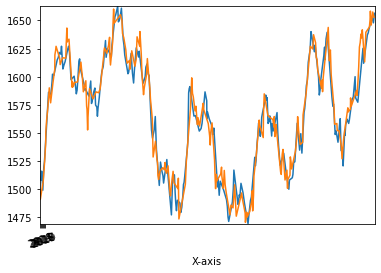

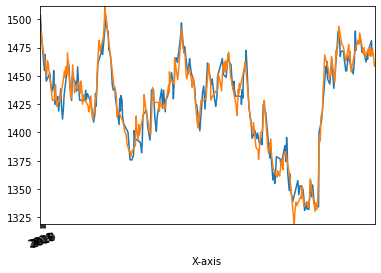

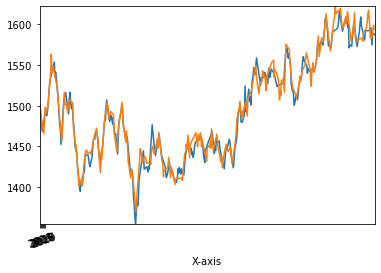

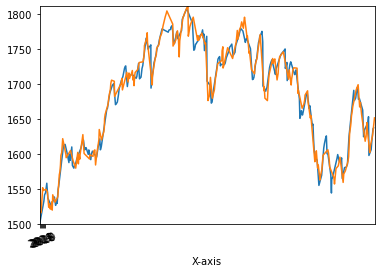

In [197]:
for team in teams_elo['TEAM'].unique():
    get_line(team)

### FURTHER ELO GRAPHING INSPIRED BY JOSH WEINER
LINK TO GITHUB REPOSITORY: CLICK [HERE](https://github.com/JoshWeiner/NBA_Game_Prediction/blob/main/CIS_545_Final_Project.ipynb)

In [198]:
import random

In [199]:
random_team = random.choice(teams_elo['TEAM'].unique())

In [200]:
random_team

'POR'

In [201]:
data = teams_elo[teams_elo['TEAM'] == random_team]
random_seasons = np.random.choice(list(set(teams_elo['SEASON'].values)), size=3, replace=False)
data = data[data['SEASON'].isin(random_seasons)]

In [202]:
random_seasons

array([2016, 2014, 2017])

## PLOTTING ELO JOINTPLOTS FOR OFFENSIVE RATING, DEFENSIVE RATING, POINTS SCORED, AND POINTS SCORED AGAINST

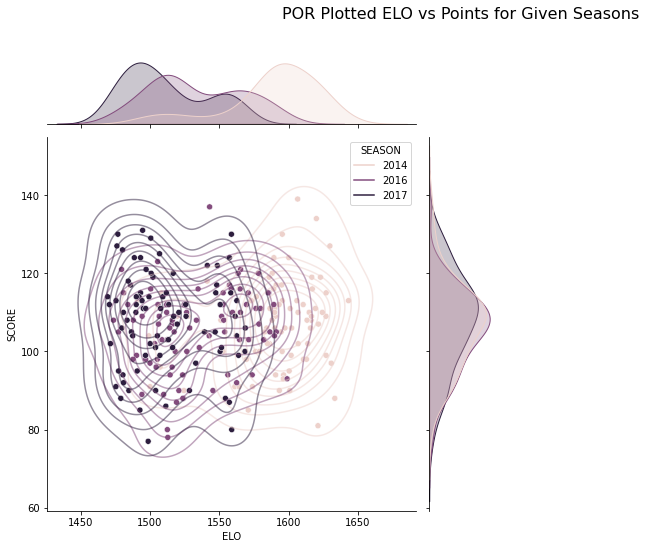

In [203]:
g = sns.jointplot(data = data, x="ELO", y="SCORE", hue="SEASON", height=7)
plt.title("{} Plotted ELO vs Points for Given Seasons".format(random_team), y=1.3, fontsize = 16)
g.plot_joint(sns.kdeplot, alpha=0.5)
plt.savefig('./charts/elo_points.png', bbox_inches='tight')

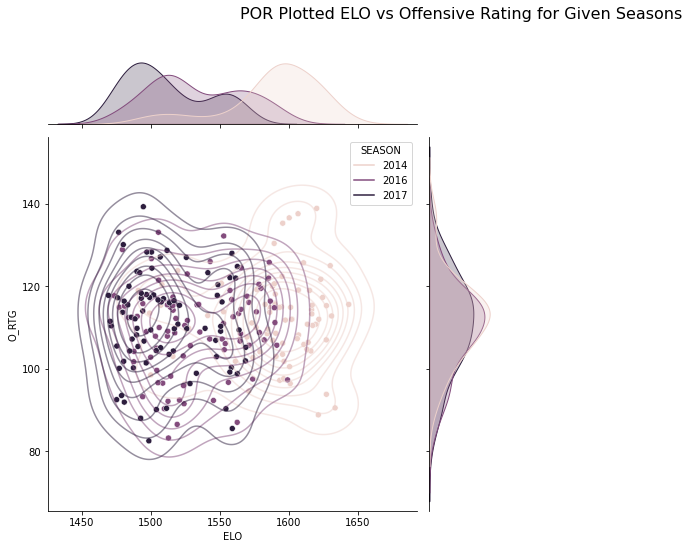

In [204]:
g = sns.jointplot(data = data, x="ELO", y="O_RTG", hue="SEASON", height=7)
plt.title("{} Plotted ELO vs Offensive Rating for Given Seasons".format(random_team), y=1.3, fontsize = 16)
g.plot_joint(sns.kdeplot, alpha=0.5)
plt.savefig('./charts/elo_ortg.png', bbox_inches='tight')

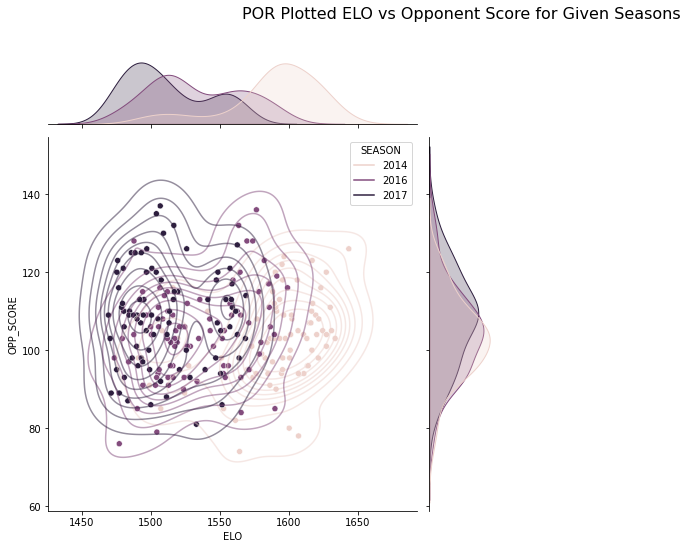

In [205]:
g = sns.jointplot(data = data, x="ELO", y="OPP_SCORE", hue="SEASON", height=7)
plt.title("{} Plotted ELO vs Opponent Score for Given Seasons".format(random_team), y=1.3, fontsize = 16)
g.plot_joint(sns.kdeplot, alpha=0.5)
plt.savefig('./charts/elo_oppscore.png', bbox_inches='tight')

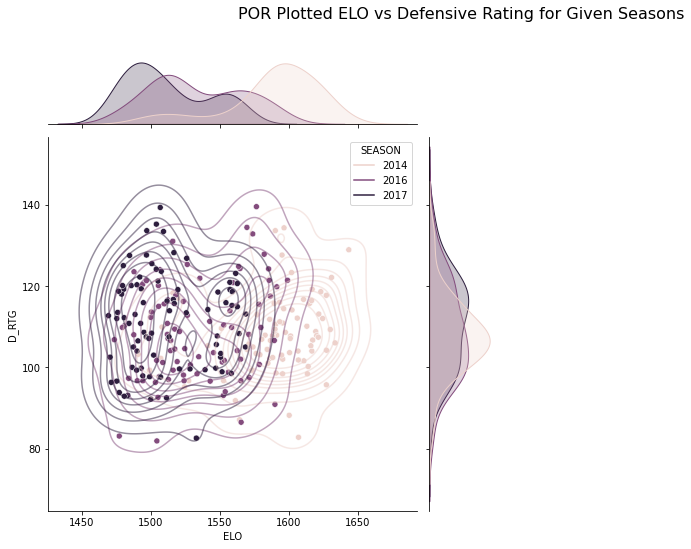

In [206]:
g = sns.jointplot(data = data, x="ELO", y="D_RTG", hue="SEASON", height=7)
plt.title("{} Plotted ELO vs Defensive Rating for Given Seasons".format(random_team), y=1.3, fontsize = 16)
g.plot_joint(sns.kdeplot, alpha=0.5)
plt.savefig('./charts/elo_drtg.png', bbox_inches='tight')

## VIOLIN PLOTS FOR DISTRIBUTION OF ELO, POINTS, OPPONENT POINTS, DEFENSIVE RATING, AND OFFENSIVE RATING

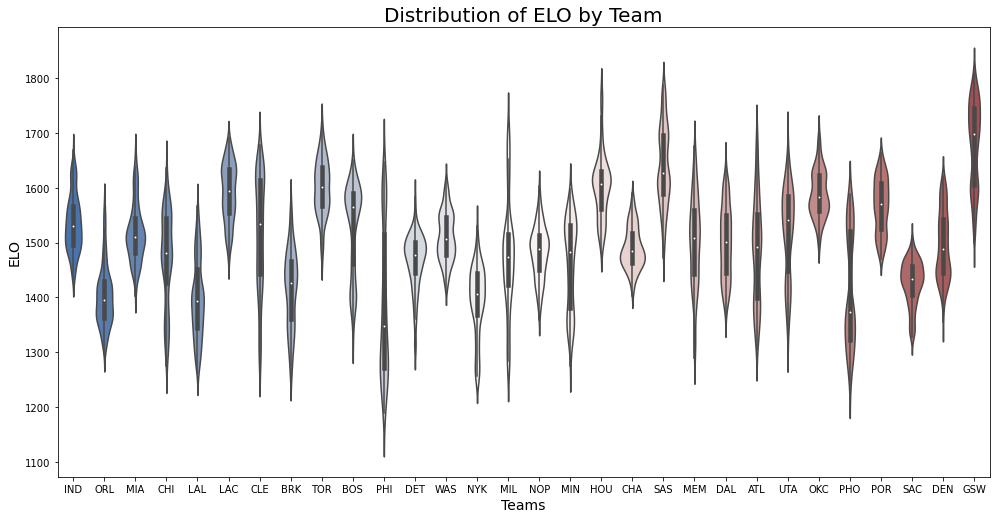

In [207]:
a4_dims = (16.7, 8.27)
data_boxplot = teams_elo[['TEAM', 'ELO']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="TEAM",y="ELO",palette="vlag",data=data_boxplot,ax=ax)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('ELO', fontsize=14)
plt.title("Distribution of ELO by Team",fontsize = 20)
plt.savefig('./charts/team_elo_violinplot.png',bbox_inches = 'tight');

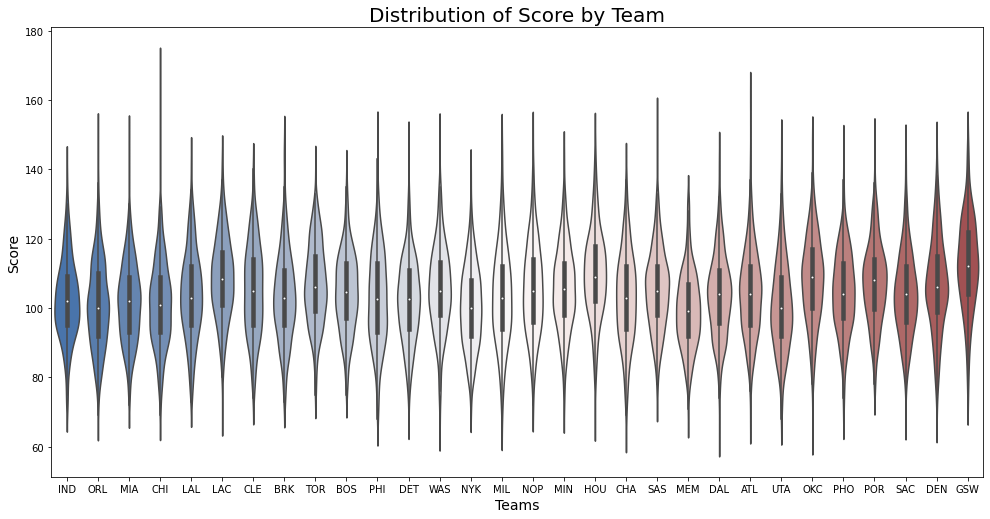

In [208]:
a4_dims = (16.7, 8.27)
data_boxplot = teams_elo[['TEAM', 'SCORE']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="TEAM",y="SCORE",palette="vlag",data=data_boxplot,ax=ax)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title("Distribution of Score by Team",fontsize = 20)
plt.savefig('./charts/team_score_violinplot.png',bbox_inches = 'tight');

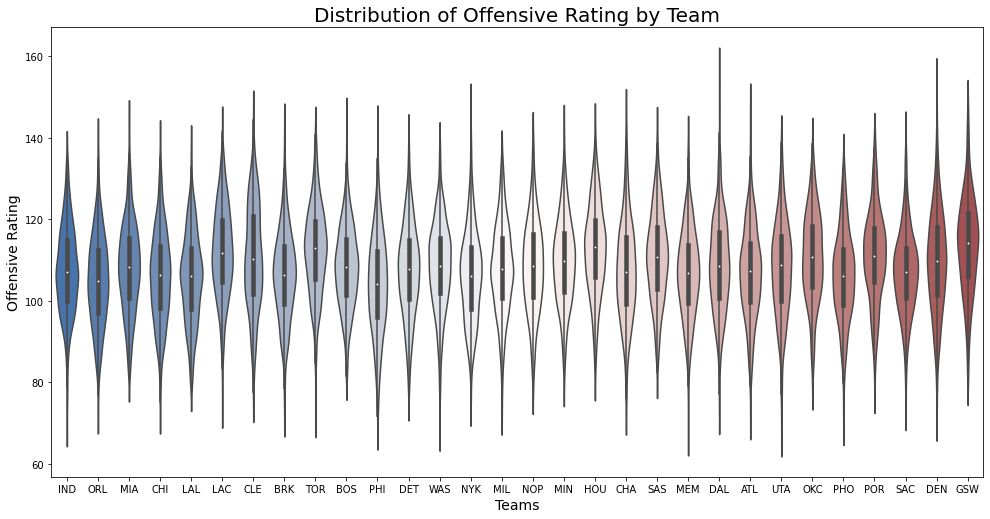

In [209]:
a4_dims = (16.7, 8.27)
data_boxplot = teams_elo[['TEAM', 'O_RTG']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="TEAM",y="O_RTG",palette="vlag",data=data_boxplot,ax=ax)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Offensive Rating', fontsize=14)
plt.title("Distribution of Offensive Rating by Team",fontsize = 20)
plt.savefig('./charts/team_ortg_violinplot.png',bbox_inches = 'tight');

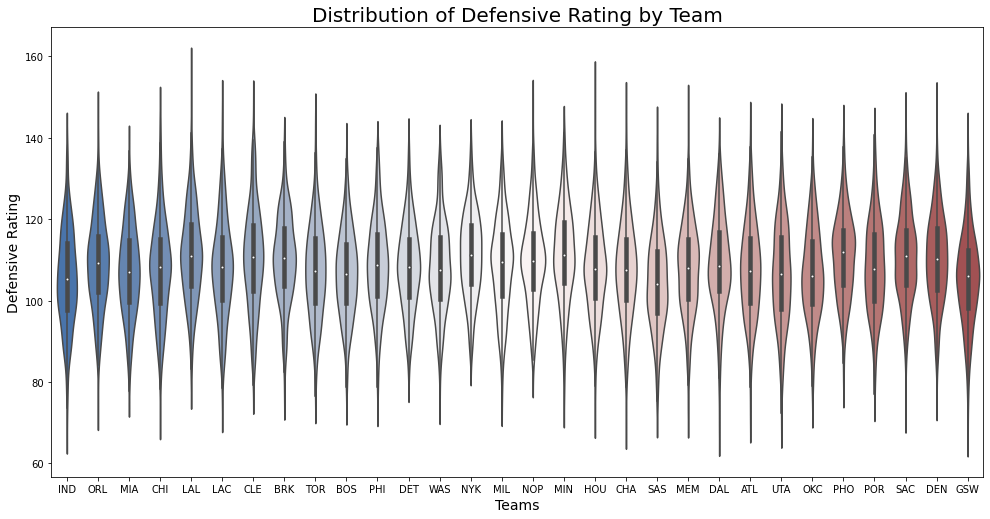

In [210]:
a4_dims = (16.7, 8.27)
data_boxplot = teams_elo[['TEAM', 'D_RTG']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="TEAM",y="D_RTG",palette="vlag",data=data_boxplot,ax=ax)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Defensive Rating', fontsize=14)
plt.title("Distribution of Defensive Rating by Team",fontsize = 20)
plt.savefig('./charts/team_drtg_violinplot.png',bbox_inches = 'tight');

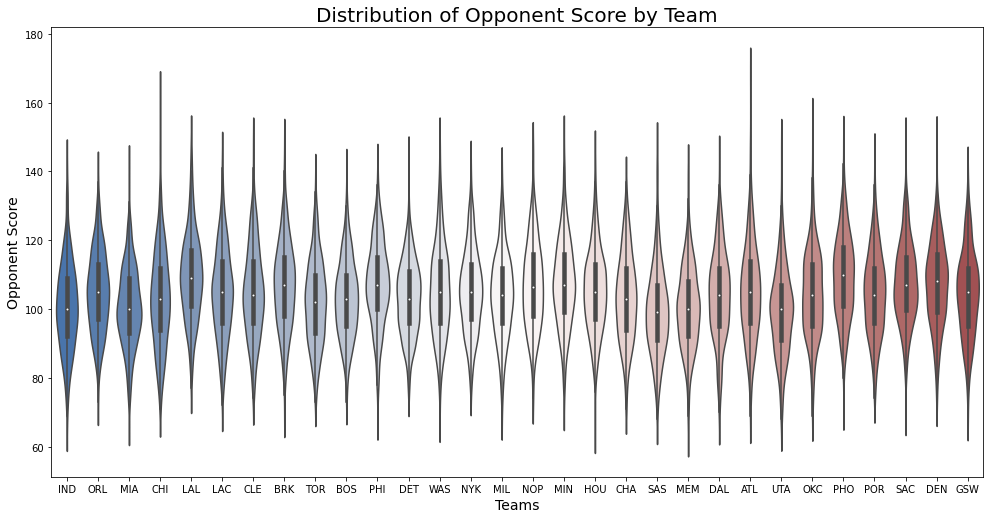

In [211]:
a4_dims = (16.7, 8.27)
data_boxplot = teams_elo[['TEAM', 'OPP_SCORE']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="TEAM",y="OPP_SCORE",palette="vlag",data=data_boxplot,ax=ax)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Opponent Score', fontsize=14)
plt.title("Distribution of Opponent Score by Team",fontsize = 20)
plt.savefig('./charts/team_opp_score_violinplot.png',bbox_inches = 'tight');

## BOX PLOTS FOR ELO, POINTS SCORED, OPPONENT POINTS SCORED, DEFENSIVE RATING, AND OFFENSIVE RATING DISTRIBUTION

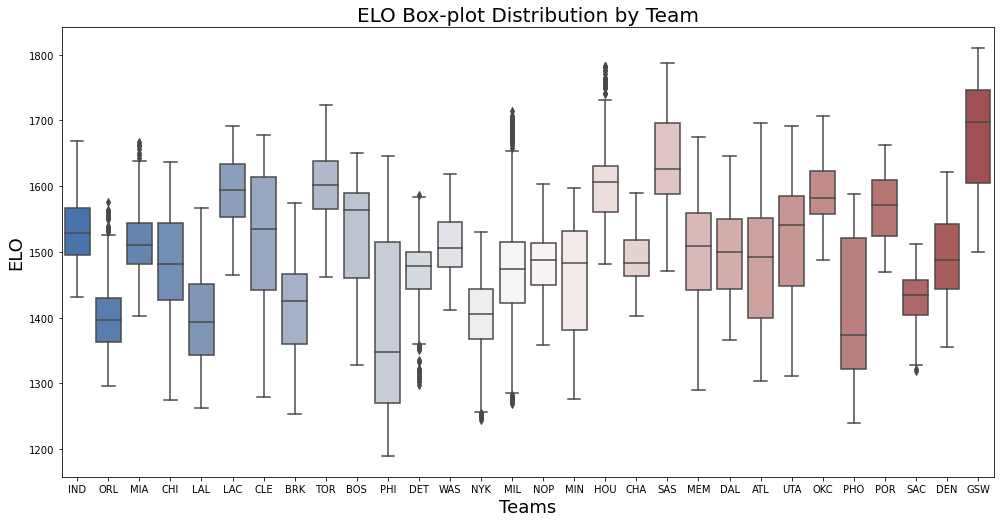

In [212]:
a4_dims = (16.7, 8.27)
data_boxplot = teams_elo[['TEAM', 'ELO']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="TEAM",y="ELO",palette="vlag",data=data_boxplot,ax=ax);
plt.xlabel('Teams', fontsize=18)
plt.ylabel('ELO', fontsize=18)
plt.title("ELO Box-plot Distribution by Team",fontsize = 20)
plt.savefig('./charts/team_elo_boxplot.png',bbox_inches = 'tight');

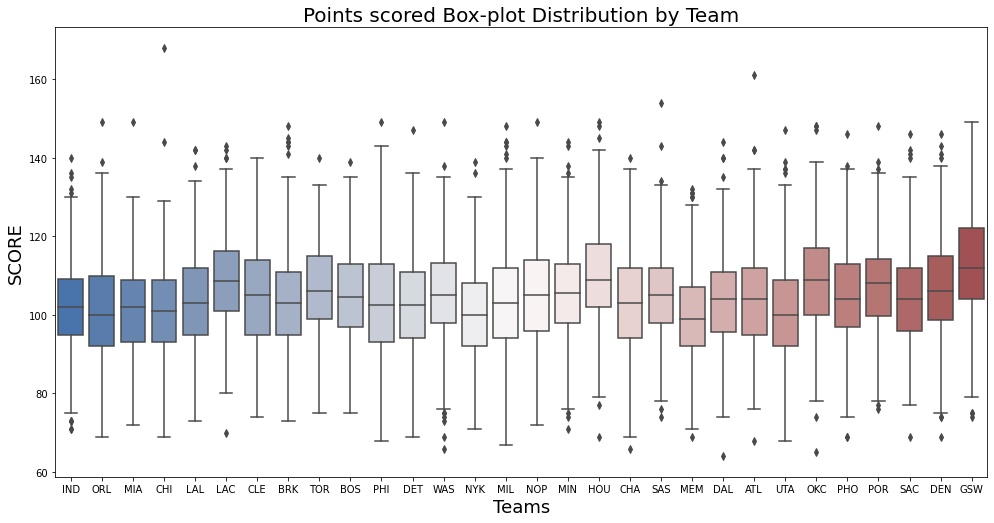

In [213]:
a4_dims = (16.7, 8.27)
data_boxplot = teams_elo[['TEAM', 'SCORE']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="TEAM",y="SCORE",palette="vlag",data=data_boxplot,ax=ax);
plt.xlabel('Teams', fontsize=18)
plt.ylabel('SCORE', fontsize=18)
plt.title("Points scored Box-plot Distribution by Team",fontsize = 20)
plt.savefig('./charts/team_score_boxplot.png',bbox_inches = 'tight');

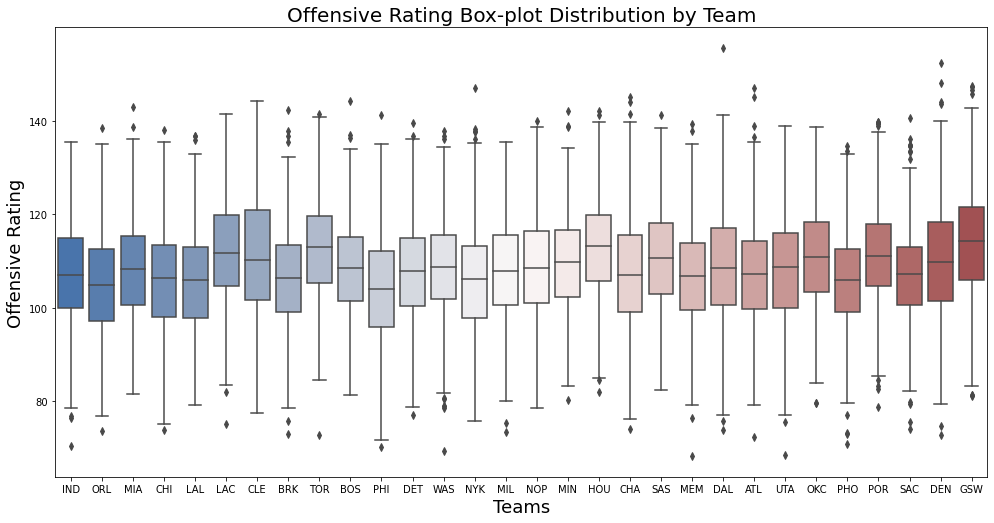

In [214]:
a4_dims = (16.7, 8.27)
data_boxplot = teams_elo[['TEAM', 'O_RTG']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="TEAM",y="O_RTG",palette="vlag",data=data_boxplot,ax=ax);
plt.xlabel('Teams', fontsize=18)
plt.ylabel('Offensive Rating', fontsize=18)
plt.title("Offensive Rating Box-plot Distribution by Team",fontsize = 20)
plt.savefig('./charts/team_ortg_boxplot.png',bbox_inches = 'tight');

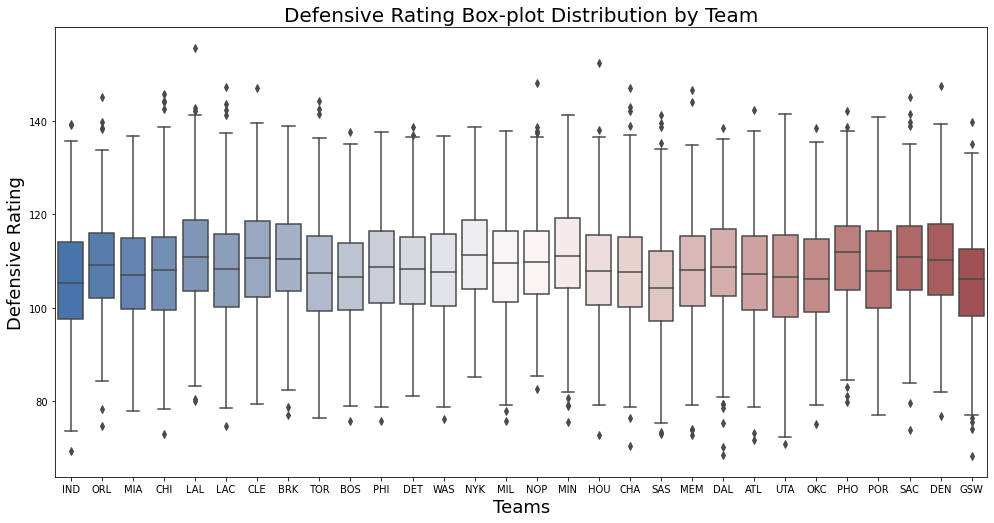

In [215]:
a4_dims = (16.7, 8.27)
data_boxplot = teams_elo[['TEAM', 'D_RTG']]
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="TEAM",y="D_RTG",palette="vlag",data=data_boxplot,ax=ax);
plt.xlabel('Teams', fontsize=18)
plt.ylabel('Defensive Rating', fontsize=18)
plt.title('Defensive Rating Box-plot Distribution by Team',fontsize = 20)
plt.savefig('./charts/team_drtg_boxplot.png',bbox_inches = 'tight');

## GETTING MEAN BAR PLOTS

Text(0.5, 1.0, 'Mean Scoring by Team')

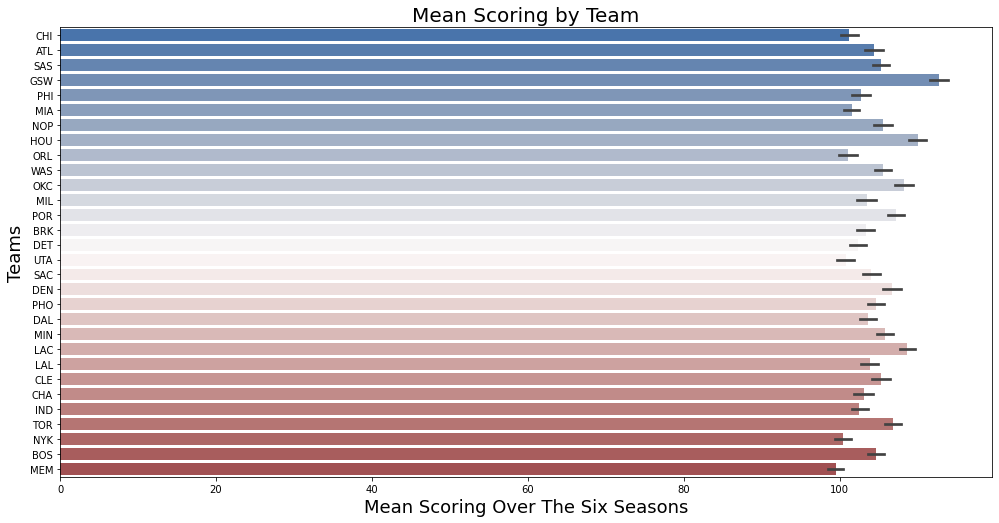

In [216]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
score_sort = teams_elo.sort_values(ascending=False,by=["SCORE"])
sns.barplot(x="SCORE",y="TEAM",palette="vlag",data=score_sort,orient="h", ax=ax);
plt.xlabel('Mean Scoring Over The Six Seasons', fontsize=18)
plt.ylabel('Teams', fontsize=18)
plt.title("Mean Scoring by Team",fontsize = 20)
#plt.savefig('./images/top_crops_by_total_production.png',bbox_inches = 'tight');

In [217]:
teams = teams_elo['TEAM'].unique()

In [218]:
teams

array(['IND', 'ORL', 'MIA', 'CHI', 'LAL', 'LAC', 'CLE', 'BRK', 'TOR',
       'BOS', 'PHI', 'DET', 'WAS', 'NYK', 'MIL', 'NOP', 'MIN', 'HOU',
       'CHA', 'SAS', 'MEM', 'DAL', 'ATL', 'UTA', 'OKC', 'PHO', 'POR',
       'SAC', 'DEN', 'GSW'], dtype=object)

In [219]:
mean_scores = []
for team in teams:
    team_df = teams_elo.loc[teams_elo['TEAM'] == team]
    mean = team_df['SCORE'].mean()
    mean_scores.append((team, mean))

In [220]:
mean_scores

[('IND', 102.48373983739837),
 ('ORL', 101.01016260162602),
 ('MIA', 101.53658536585365),
 ('CHI', 101.13821138211382),
 ('LAL', 103.85975609756098),
 ('LAC', 108.65853658536585),
 ('CLE', 105.22764227642277),
 ('BRK', 103.30081300813008),
 ('TOR', 106.82113821138212),
 ('BOS', 104.6239837398374),
 ('PHI', 102.71138211382114),
 ('DET', 102.27642276422765),
 ('WAS', 105.51422764227642),
 ('NYK', 100.3678861788618),
 ('MIL', 103.4308943089431),
 ('NOP', 105.54878048780488),
 ('MIN', 105.77642276422765),
 ('HOU', 109.95934959349593),
 ('CHA', 103.04471544715447),
 ('SAS', 105.29878048780488),
 ('MEM', 99.48373983739837),
 ('DAL', 103.57520325203252),
 ('ATL', 104.3739837398374),
 ('UTA', 100.73373983739837),
 ('OKC', 108.20934959349593),
 ('PHO', 104.60365853658537),
 ('POR', 107.15040650406505),
 ('SAC', 104.04065040650407),
 ('DEN', 106.6869918699187),
 ('GSW', 112.6890243902439)]

In [221]:
def Convert(tup, di):
    di = dict(tup)
    return di
mean_scores_dct = {}
mean_scores = (Convert(mean_scores, mean_scores_dct))

In [222]:
mean_scores

{'IND': 102.48373983739837,
 'ORL': 101.01016260162602,
 'MIA': 101.53658536585365,
 'CHI': 101.13821138211382,
 'LAL': 103.85975609756098,
 'LAC': 108.65853658536585,
 'CLE': 105.22764227642277,
 'BRK': 103.30081300813008,
 'TOR': 106.82113821138212,
 'BOS': 104.6239837398374,
 'PHI': 102.71138211382114,
 'DET': 102.27642276422765,
 'WAS': 105.51422764227642,
 'NYK': 100.3678861788618,
 'MIL': 103.4308943089431,
 'NOP': 105.54878048780488,
 'MIN': 105.77642276422765,
 'HOU': 109.95934959349593,
 'CHA': 103.04471544715447,
 'SAS': 105.29878048780488,
 'MEM': 99.48373983739837,
 'DAL': 103.57520325203252,
 'ATL': 104.3739837398374,
 'UTA': 100.73373983739837,
 'OKC': 108.20934959349593,
 'PHO': 104.60365853658537,
 'POR': 107.15040650406505,
 'SAC': 104.04065040650407,
 'DEN': 106.6869918699187,
 'GSW': 112.6890243902439}

In [223]:
means = pd.DataFrame.from_dict(mean_scores, orient='index')

In [224]:
means.rename(columns={0:'MEANS'},inplace=True)

In [225]:
means = means.sort_values(by='MEANS')

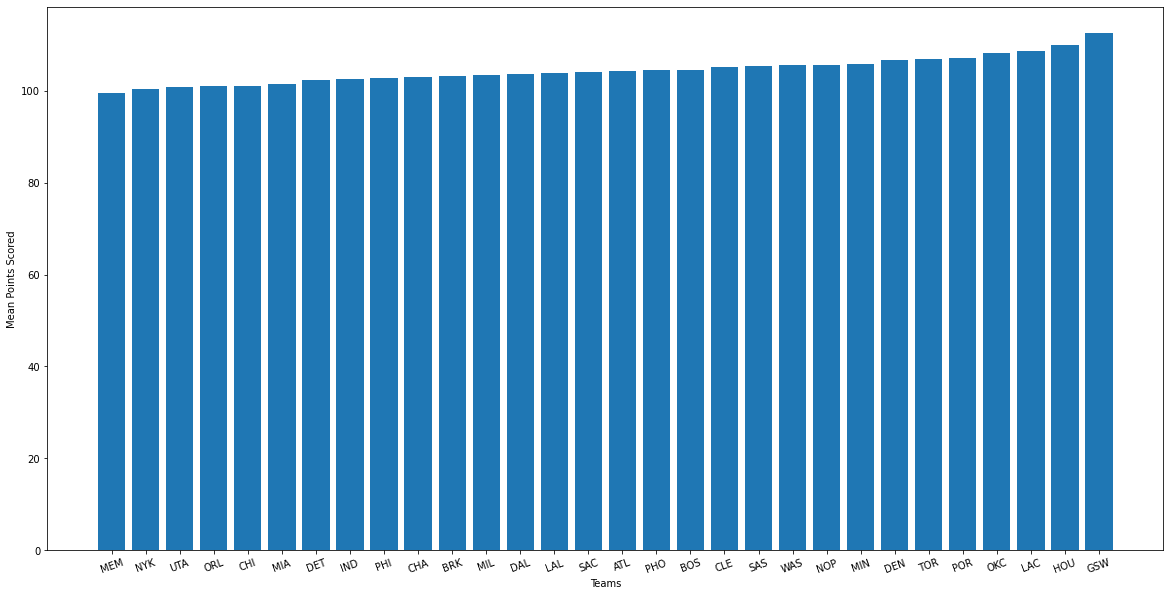

In [226]:
plt.figure(figsize=(20,10))
plt.bar(means.index, height=means['MEANS'].sort_values())
plt.ylabel('Mean Points Scored')
plt.xlabel('Teams')
plt.xticks(rotation=20);

In [227]:
mean_elo = []
for team in teams:
    team_df = teams_elo.loc[teams_elo['TEAM'] == team]
    mean = team_df['ELO'].mean()
    mean_elo.append((team, mean))

In [228]:
mean_elo_dct = {}
mean_elo = (Convert(mean_elo, mean_elo_dct))
means_elo = pd.DataFrame.from_dict(mean_elo, orient='index')
means_elo.rename(columns={0:'MEANS'},inplace=True)

In [229]:
means_elo = means_elo.sort_values(by='MEANS')

In [230]:
means_elo

,MEANS
PHI,1386.162378
NYK,1396.466737
LAL,1396.832032
ORL,1401.460832
PHO,1413.496221
BRK,1416.009846
SAC,1427.185687
MIN,1461.591369
DET,1466.545795
CHI,1472.739468


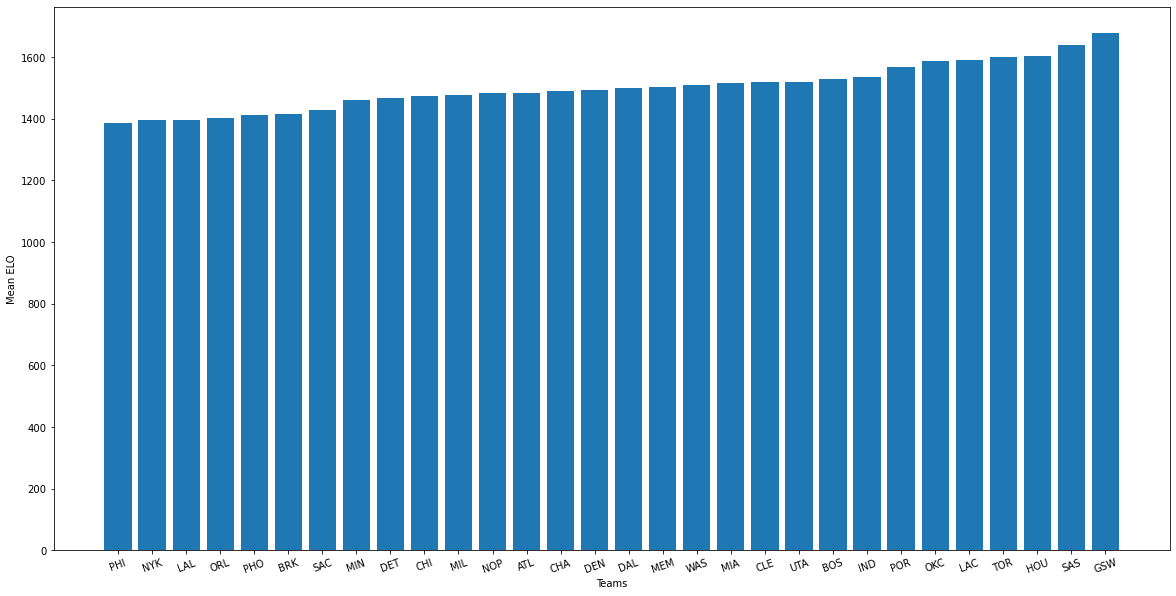

In [231]:
plt.figure(figsize=(20,10))
plt.bar(means_elo.index, height=means_elo['MEANS'].sort_values())
plt.ylabel('Mean ELO')
plt.xlabel('Teams')
plt.xticks(rotation=20);

(array([  85.,  522., 1176., 2093., 3193., 3375., 2694., 1110.,  334.,
         178.]),
 array([1189.11572071, 1251.27251283, 1313.42930496, 1375.58609708,
        1437.74288921, 1499.89968133, 1562.05647346, 1624.21326558,
        1686.37005771, 1748.52684983, 1810.68364196]),
 <BarContainer object of 10 artists>)

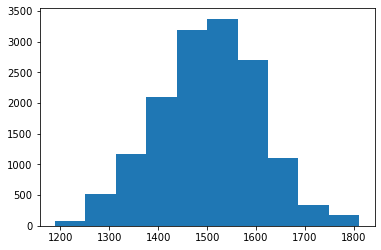

In [232]:
plt.hist(teams_elo['ELO'])

## SPLITTING THE DATA INTO SEASON HALVES
Now we get into EDA on the data when split into halves

In [233]:
# SPLITTING THE DATAFRAME INTO HALVES
first_half = teams_elo.loc[teams_elo['GAME_NO'] <= 41]
second_half = teams_elo.loc[teams_elo['GAME_NO'] > 41]

In [234]:
len(first_half)

7380

In [235]:
len(second_half)

7380

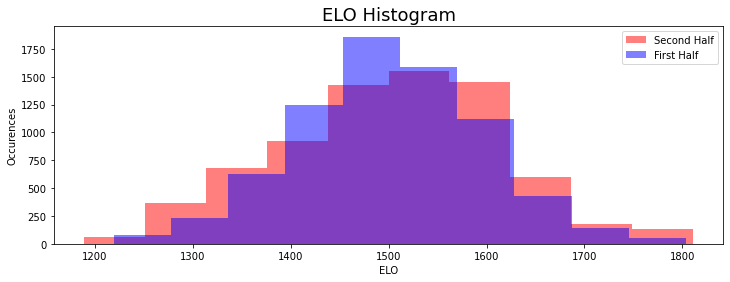

In [236]:
plt.figure(figsize=(12,4))
plt.hist(second_half['ELO'], color='r',alpha=0.5)
plt.hist(first_half['ELO'], color='blue',alpha=0.5)
plt.xlabel('ELO')
plt.ylabel('Occurences')
plt.title('ELO Histogram', fontsize=18)
plt.legend(labels=['Second Half', 'First Half'])
plt.savefig('./charts/hist_elo_halves.png', bbox_inches='tight');

In [237]:
first_half['ELO'].skew(), second_half['ELO'].skew()

(0.002953748642130477, -0.1184752857518696)

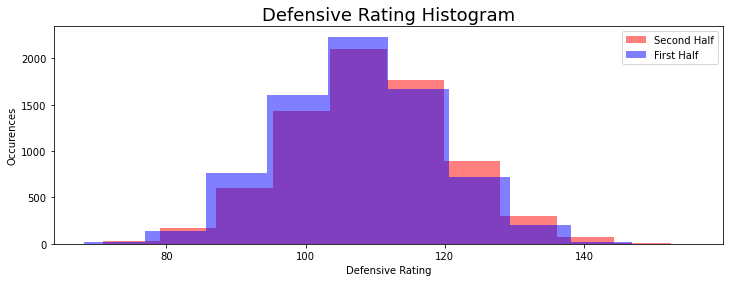

In [238]:
plt.figure(figsize=(12,4))
plt.hist(second_half['D_RTG'], color='r',alpha=0.5)
plt.hist(first_half['D_RTG'], color='blue',alpha=0.5)
plt.xlabel('Defensive Rating')
plt.ylabel('Occurences')
plt.title('Defensive Rating Histogram', fontsize= 18)
plt.legend(labels=['Second Half', 'First Half'])
plt.savefig('./charts/hist_drtg_halves.png', bbox_inches='tight');

In [239]:
first_half['D_RTG'].skew(), second_half['D_RTG'].skew()

(0.03230015714615164, 0.012708791249707908)

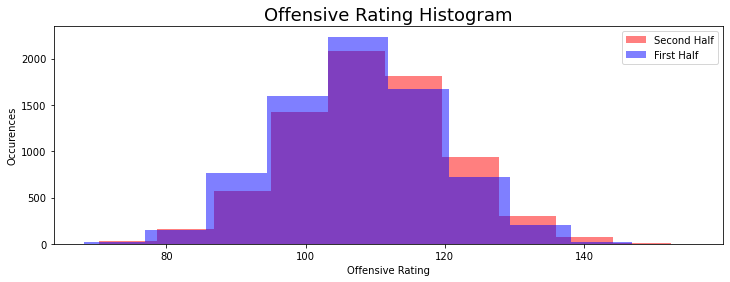

In [240]:
plt.figure(figsize=(12,4))
plt.hist(second_half['O_RTG'], color='r',alpha=0.5)
plt.hist(first_half['O_RTG'], color='blue',alpha=0.5)
plt.xlabel('Offensive Rating')
plt.ylabel('Occurences')
plt.title('Offensive Rating Histogram', fontsize= 18)
plt.legend(labels=['Second Half', 'First Half'])
plt.savefig('./charts/hist_ortg_halves.png', bbox_inches='tight');

In [241]:
first_half['O_RTG'].skew(), second_half['O_RTG'].skew()

(0.034274926319889355, 0.010485689286504778)

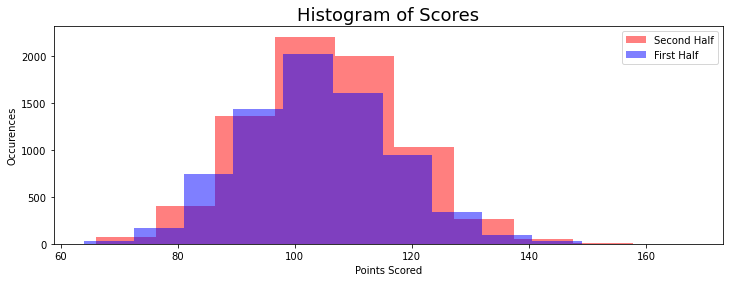

In [242]:
plt.figure(figsize=(12,4))
plt.hist(second_half['SCORE'], color='r',alpha=0.5)
plt.hist(first_half['SCORE'], color='blue',alpha=0.5)
plt.xlabel('Points Scored')
plt.ylabel('Occurences')
plt.title('Histogram of Scores', fontsize= 18)
plt.legend(labels=['Second Half', 'First Half'])
plt.savefig('./charts/hist_scores_halves.png', bbox_inches='tight');

In [243]:
first_half['SCORE'].skew(), second_half['SCORE'].skew()

(0.17269339326370917, 0.15364340045372937)

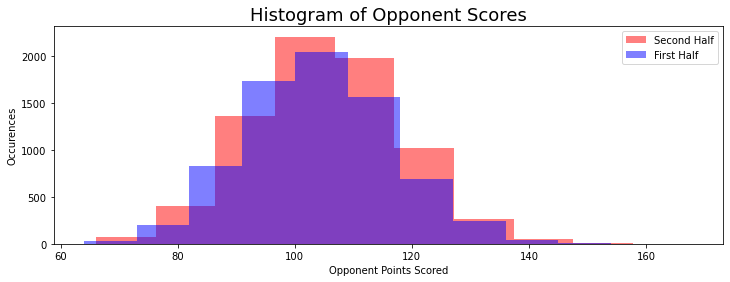

In [244]:
plt.figure(figsize=(12,4))
plt.hist(second_half['OPP_SCORE'], color='r',alpha=0.5)
plt.hist(first_half['OPP_SCORE'], color='blue',alpha=0.5)
plt.xlabel('Opponent Points Scored')
plt.ylabel('Occurences')
plt.title('Histogram of Opponent Scores', fontsize= 18)
plt.legend(labels=['Second Half', 'First Half'])
plt.savefig('./charts/hist_opp_halves.png', bbox_inches='tight');

In [245]:
first_half['OPP_SCORE'].skew(), second_half['OPP_SCORE'].skew()

(0.17235480077987073, 0.15379678448172207)